# Customer Churn using ANN

In [ ]:
#It will download and install all the libraries which are dependent on the Keras
conda install -c conda-forge keras

#### Part 1 - Data Preprocessing

In [2]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Importing the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Complete-Deep-Learning/master/ANN/Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [4]:
#Create dummy variables for the categorical columns or features
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [5]:
#Concatenate the Data Frames
X=pd.concat([X,geography,gender],axis=1)

In [6]:
#Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [7]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
# Feature Scaling(It the input size is bigger it will take time while multipying the weight with input and samee thing will happen while back propogation.)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Part 2 - Now let's make the ANN!

In [13]:
!pip install tensorflow

     |████████████████████████████████| 199.0 MB 35 kB/s  eta 0:00:01    |█████████▏                      | 56.8 MB 941 kB/s eta 0:02:32     |██████████████▍                 | 89.4 MB 3.9 MB/s eta 0:00:28     |████████████████▏               | 100.3 MB 1.2 MB/s eta 0:01:24     |██████████████████████████████▍ | 189.3 MB 1.6 MB/s eta 0:00:07
     |████████████████████████████████| 2.9 MB 998 kB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 15.6 MB 3.7 MB/s eta 0:00:01    |█████████                       | 4.4 MB 1.4 MB/s eta 0:00:08
     |████████████████████████████████| 5.6 MB 937 kB/s eta 0:00:01kB/s eta 0:00:01
     |████████████████████████████████| 42 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 132 kB 1.5 MB/s eta 0:00:01
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     |████████████████████████████████| 462 kB 1.4 MB/s eta 0:00:01
  Using cached google_pasta-0.2.0-py3-none

In [14]:
#Importing the Keras libraries and packages
import keras
from keras.models import Sequential #For creating models
from keras.layers import Dense #For hidden layer
#from keras.layers import LeakyReLU,PReLU,ELU 
from keras.layers import Dropout #Droupout layer

In [18]:
#Initialising the ANN
classifier = Sequential()

#Adding the input layer and the first hidden layer(6 hidden neurons, 11 input dimensions)
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

#Adding the second hidden layer(6 hidden neurons)
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

#Adding the output layer(Binary dimension)
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

#Compiling the ANN
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [33]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [20]:
#Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.6047 - accuracy: 0.7574 - val_loss: 0.5559 - val_accuracy: 0.7944
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5369 - accuracy: 0.8039 - val_loss: 0.5099 - val_accuracy: 0.8023
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4972 - accuracy: 0.8097 - val_loss: 0.4821 - val_accuracy: 0.8058
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4725 - accuracy: 0.8130 - val_loss: 0.4660 - val_accuracy: 0.8103
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4577 - accuracy: 0.8145 - val_loss: 0.4570 - val_accuracy: 0.8111
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4484 - accuracy: 0.8175 - val_loss: 0.4509 - val_accuracy: 0.8099
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4417 - accuracy: 0.8175 - val_loss: 0.4469 - val_accuracy: 0.8107

Epoch 58/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3352 - accuracy: 0.8615 - val_loss: 0.3579 - val_accuracy: 0.8550
Epoch 59/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3347 - accuracy: 0.8625 - val_loss: 0.3578 - val_accuracy: 0.8554
Epoch 60/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3345 - accuracy: 0.8625 - val_loss: 0.3579 - val_accuracy: 0.8550
Epoch 61/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3340 - accuracy: 0.8621 - val_loss: 0.3581 - val_accuracy: 0.8550
Epoch 62/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3340 - accuracy: 0.8617 - val_loss: 0.3572 - val_accuracy: 0.8569
Epoch 63/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3336 - accuracy: 0.8621 - val_loss: 0.3572 - val_accuracy: 0.8569
Epoch 64/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3334 - accuracy: 0.8625 - val_loss: 0.3569 - val_accuracy:

#### Part 3 - Making the predictions and evaluating the model

In [25]:
#Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(cm)
print(score)

[[1520   75]
 [ 205  200]]
0.86


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


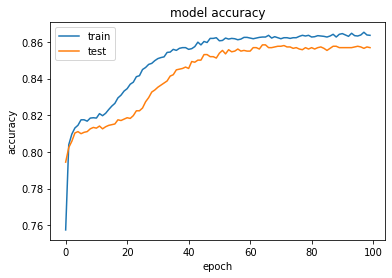

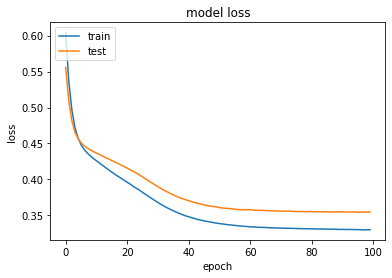

In [30]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()